# Load libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data as dataframe
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Normalise data

In [3]:
#normalising data except time and class columns
data2= (data.iloc[:,1:-1] - data.iloc[:,1:-1].min()) / (data.iloc[:,1:-1].max() - data.iloc[:,1:-1].min())
data2['Class']=data['Class']

#Converting time in seconds to hours 
data2['Hour'] = data['Time'] //3600
data2['Hour'].replace(-0,0,inplace=True)
data=data2
print("Normalised data :")
data.head()

Normalised data :


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-0.023101,-0.000768,0.043951,0.061092,-0.002278,0.004649,0.001460,0.001059,0.012532,0.001878,...,0.012961,-0.001641,0.009019,0.007215,-0.030892,0.002465,-0.000427,0.002385,0,0.0
1,0.020248,0.002808,0.002885,0.019866,0.000404,-0.000828,-0.000480,0.000913,-0.008799,-0.003455,...,-0.029794,0.001504,-0.045794,0.009384,0.020565,-0.000166,0.000299,-0.003334,0,0.0
2,-0.023077,-0.014141,0.030727,0.016835,-0.003388,0.018102,0.004822,0.002657,-0.052177,0.004296,...,0.035999,0.013506,-0.092880,-0.018391,-0.022721,-0.001022,-0.001213,0.011300,0,0.0
3,-0.016416,-0.001954,0.031070,-0.038269,-0.000069,0.012539,0.001448,0.004049,-0.047781,-0.001137,...,0.000246,-0.002826,-0.158408,0.036339,-0.036252,0.001158,0.001247,0.001368,0,0.0
4,-0.019677,0.009261,0.026837,0.017866,-0.002741,0.000964,0.003612,-0.002902,0.028170,0.015581,...,0.037240,-0.002041,0.019036,-0.011564,0.082048,0.004050,0.004366,-0.000715,0,0.0


# SMOTE (to remove imbalance problem)

In [4]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
def do_smote(data):
    names=list(data)
    y_t = data.Class
    X_t = data.drop('Class', axis=1)
    X_t, y_t = smt.fit_sample(X_t, y_t)
    #np.bincount(y_t)
    X=pd.DataFrame(X_t)
    X['Class']=y_t
    X.columns = names
    return X

In [5]:
smoted_data=do_smote(data)

# Visualise features

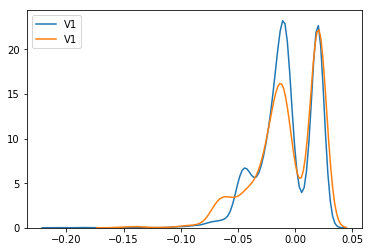

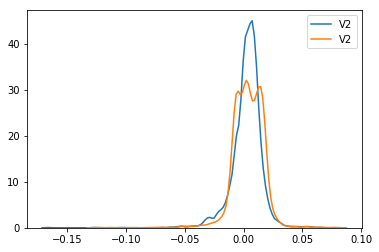

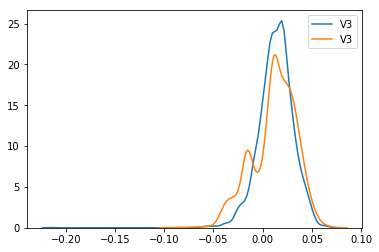

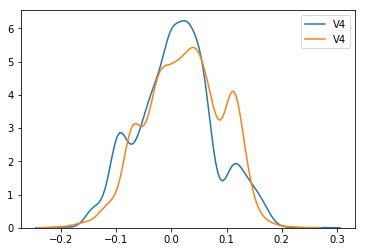

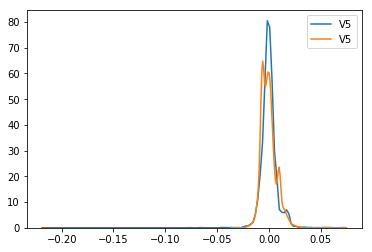

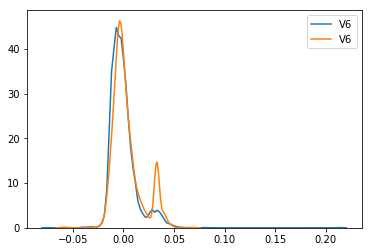

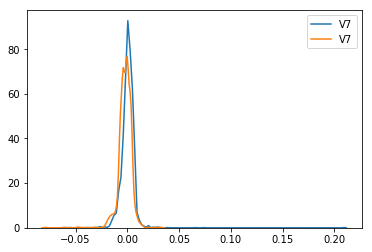

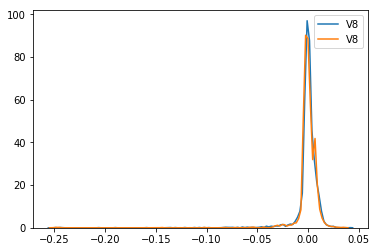

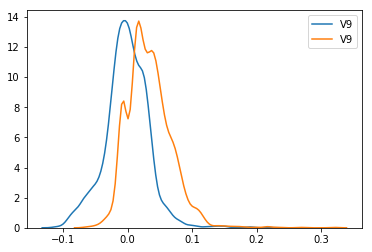

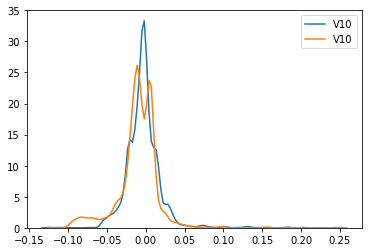

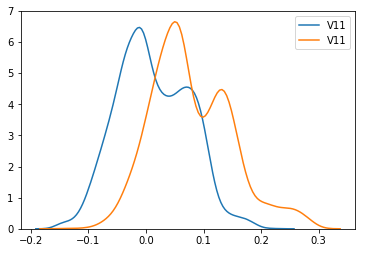

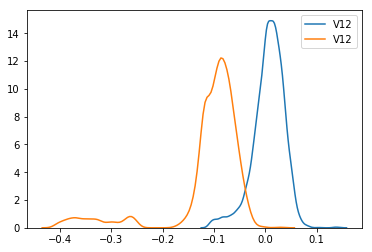

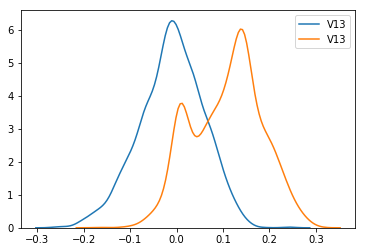

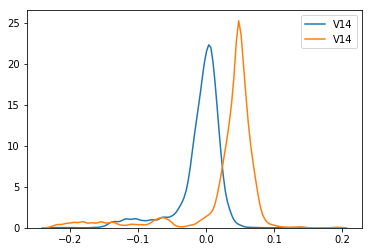

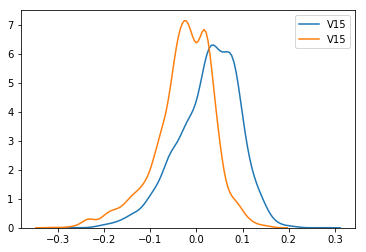

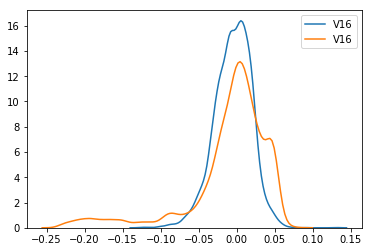

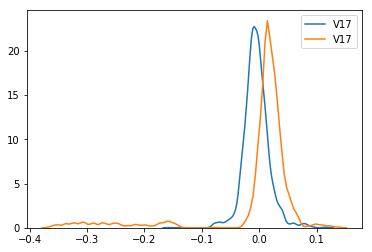

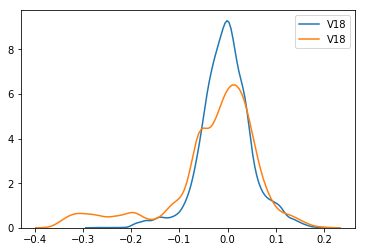

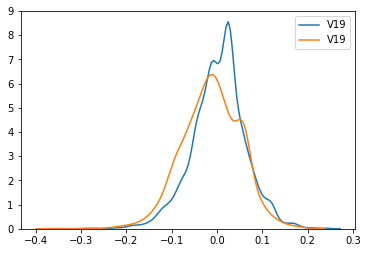

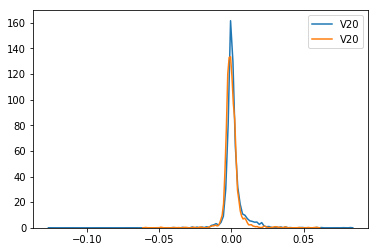

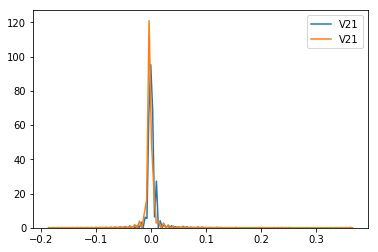

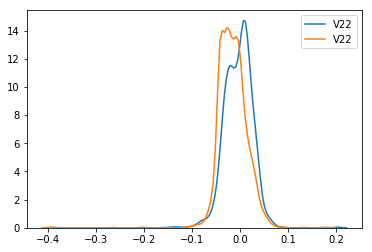

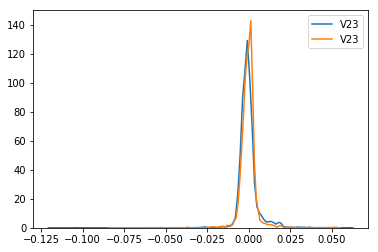

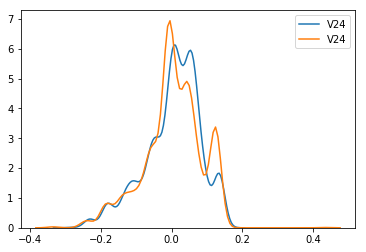

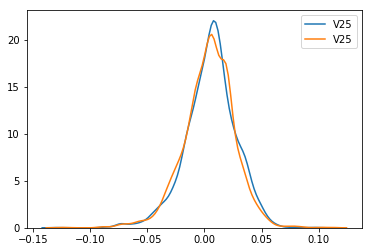

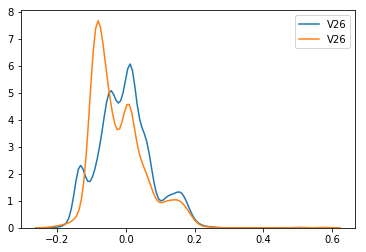

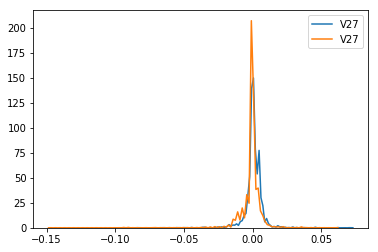

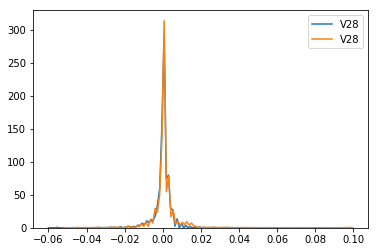

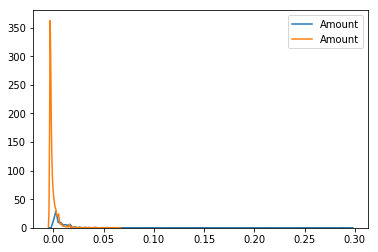

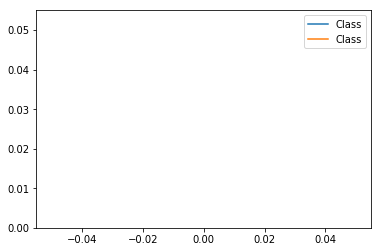

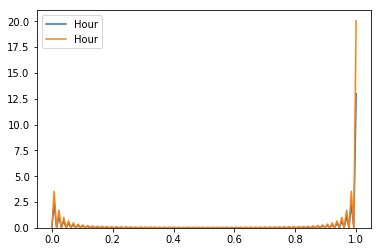

In [6]:
for j in list(smoted_data):
    for i in range(2):
        sns.kdeplot(smoted_data[smoted_data.Class==i][j])
    plt.show()

In [7]:
keep=['V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19','V21','V26','Amount','Hour','Class']

In [8]:
data=data[keep]

In [9]:
data.head()
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Splitting data

In [10]:
# Separate input features (X) and target variable (y)

y = data.Class
X = data.drop('Class', axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(227845, 19)

# Smote on Train data

In [11]:
data=pd.DataFrame(X_train)
keep.remove('Class')
data.columns=keep
data['Class']=y_train
final_data=do_smote(data)

In [12]:
final_data.Class.value_counts()

1    227445
0    227445
Name: Class, dtype: int64

In [13]:
final_data.shape

(454890, 20)

# Metric function

In [14]:
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_auc_score
def get_performance_metrics(y_test,model_predictions):
    # Accuracy
    model_accuracy = accuracy_score(y_test,model_predictions)
    print("Accuracy is ", model_accuracy)

    # precision, recall, f1 score
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test,model_predictions)
    print('Precision for each class is ', model_precision)
    print('Recall/sensitivity for each class is ', model_recall)
    print('F1 Score for each class is ', model_f1)

    # roc_auc
    model_roc_auc = roc_auc_score(y_test,model_predictions)
    print('AUC-ROC score is ', model_roc_auc)

    # confusion matrix
    model_confusion_matrix = confusion_matrix(y_test,model_predictions)
    print('confusion matrix is :-->')
    print(model_confusion_matrix)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
# Train model
reg = LogisticRegression().fit(final_data.drop('Class', axis=1), final_data.Class)
 
# Predict
pred_y = reg.predict(X_test)
 
get_performance_metrics(y_test, pred_y)

Accuracy is  0.9896773287454794
Precision for each class is  [0.99980463 0.1231003 ]
Recall/sensitivity for each class is  [0.98985405 0.88043478]
F1 Score for each class is  [0.99480446 0.216     ]
AUC-ROC score is  0.9351444178561328
confusion matrix is :-->
[[56293   577]
 [   11    81]]


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(class_weight={0: 100,1: 1})
rf.fit(final_data.drop('Class', axis=1), final_data.Class)
 # Predict on training set
pred_y = rf.predict(X_test)
get_performance_metrics(y_test, pred_y)

Accuracy is  0.9993153330290369
Precision for each class is  [0.9997362  0.76237624]
Recall/sensitivity for each class is  [0.99957798 0.83695652]
F1 Score for each class is  [0.99965709 0.79792746]
AUC-ROC score is  0.9182672533084609
confusion matrix is :-->
[[56846    24]
 [   15    77]]


# SVM

In [27]:
#final_data=final_data[:100,:]
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
#train
svc_model.fit(final_data.drop('Class', axis=1)[:454890], final_data.Class[:454890])
#predict
svc_predictions= svc_model.predict(X_test)
get_performance_metrics(y_test,svc_predictions)

Accuracy is  0.9926793300797022
Precision for each class is  [0.99975213 0.16216216]
Recall/sensitivity for each class is  [0.99291366 0.84782609]
F1 Score for each class is  [0.99632116 0.27225131]
AUC-ROC score is  0.9203698748480517
confusion matrix is :-->
[[56467   403]
 [   14    78]]
